# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

_(ii)_ What concept ‘defines’ the plotted line?

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

- The 'medv' variable represents the median value of owner-occupied homes in thousands of dollars, and the 'dis' variable represents the weighted distances to five Boston employment centers.

_(ii)_ What concept ‘defines’ the plotted line?
- The plotted line represents the linear regression model's prediction of the 'medv' values based on the 'dis' values.

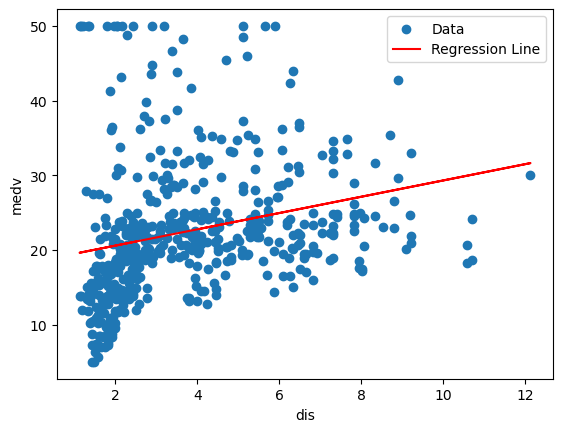

In [4]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?
- Null Hypothesis (H0): there is no significant (linear) relationship between the 'medv' and 'dis'.
- Alternative Hypothesis (H1): there is a significant (linear) relationship between the 'medv' and 'dis'. As the distances to employment centers change, the median value of owner-occupied homes also changes in a statistically significant manner.

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [5]:
# Add your code here

# Prepare the data
X = Boston['dis']  # Predictor variable
X = sm.add_constant(X)  # Add a constant term for the intercept
y = Boston['medv']  # Response variable

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Review Coefficient Estimates
print(results.summary())

# Review Confidence Intervals
confidence_intervals = results.conf_int()
print(confidence_intervals)


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 28 May 2024   Prob (F-statistic):           1.21e-08
Time:                        15:59:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  


In [6]:
# Your answer here
# Coefficient estimates for B0 (intercept) and B1 (slope)
intercept_estimate = results.params['const']
slope_estimate = results.params['dis']

print("Coefficient estimate for B0 (intercept):", intercept_estimate)
print("Coefficient estimate for B1 (slope):", slope_estimate)


Coefficient estimate for B0 (intercept): 18.39008833049339
Coefficient estimate for B1 (slope): 1.0916130158411075


In [7]:
# Standard errors for B0 (intercept) and B1 (slope)
intercept_se = results.bse['const']
slope_se = results.bse['dis']

print("Standard error for B0 (intercept):", intercept_se)
print("Standard error for B1 (slope):", slope_se)


Standard error for B0 (intercept): 0.817388708502475
Standard error for B1 (slope): 0.18837841478683096


In [8]:
# Confidence intervals for B0 (intercept) and B1 (slope)
confidence_intervals = results.conf_int()
confidence_interval_b0 = confidence_intervals.loc['const']
confidence_interval_b1 = confidence_intervals.loc['dis']

print("Confidence interval for B0 (intercept):", confidence_interval_b0)
print("Confidence interval for B1 (slope):", confidence_interval_b1)


Confidence interval for B0 (intercept): 0    16.784179
1    19.995997
Name: const, dtype: float64
Confidence interval for B1 (slope): 0    0.721509
1    1.461717
Name: dis, dtype: float64


_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
- Coefficient estimate for B0 (intercept): 18.39008833049339;  Coefficient estimate for B1 (slope): 1.0916130158411075 

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
- Standard error for B0 (intercept): 0.817388708502475;
Standard error for B1 (slope): 0.18837841478683096

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  
- The 95% confidence interval for B0 (intercept) is [16.784179, 19.995997].
- The 95% confidence interval for B1 (slope) is [0.721509, 1.461717].



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

In [9]:
# Your answer here
# Retrieve R-squared value
r_squared = results.rsquared

print("R-squared value:", r_squared)


R-squared value: 0.062464372121782574


In [10]:
# Retrieve F-statistic and its p-value
f_statistic = results.fvalue
p_value = results.f_pvalue

print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 33.57957032590534
p-value: 1.2066117273372497e-08


_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
- No, with an R^2 value of 0.0625, it suggests that only 6.25% of the variance in the 'medv' values can be explained by the 'dis' values in the model.

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value). 
- Yes, we reject the (implied) null hypothesis. With a very small p-value (1.2066117273372497e-08) less than a chosen significance level, such as 0.05), we reject this null hypothesis. This decision is supported by a significant F-statistic (33.57957032590534) in this case, which measures the overall significance of the regression model.

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [12]:
# Add your code here

# Prepare the data
X = Boston[['dis', 'rm']]  # Predictor variable
X = sm.add_constant(X)  # Add a constant term for the intercept
y = Boston['medv']  # Response variable

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Review Coefficient Estimates
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Tue, 28 May 2024   Prob (F-statistic):           1.84e-75
Time:                        16:02:36   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

In [14]:
# Add your code here

# Extract p-values for the coefficients
p_values = results.pvalues
print("P-values for the coefficients:")
print(p_values)
# Extract F-statistic and its p-value
f_statistic = results.fvalue
f_pvalue = results.f_pvalue
print("F-statistic: ", f_statistic)
print("P-value of the F-statistic: ", f_pvalue)

P-values for the coefficients:
const    2.006139e-34
dis      5.884052e-04
rm       1.064106e-69
dtype: float64
F-statistic:  247.03773590012824
P-value of the F-statistic:  1.8375874764537185e-75


Text(0.5, 1.0, 'Residuals vs. Fitted Values')

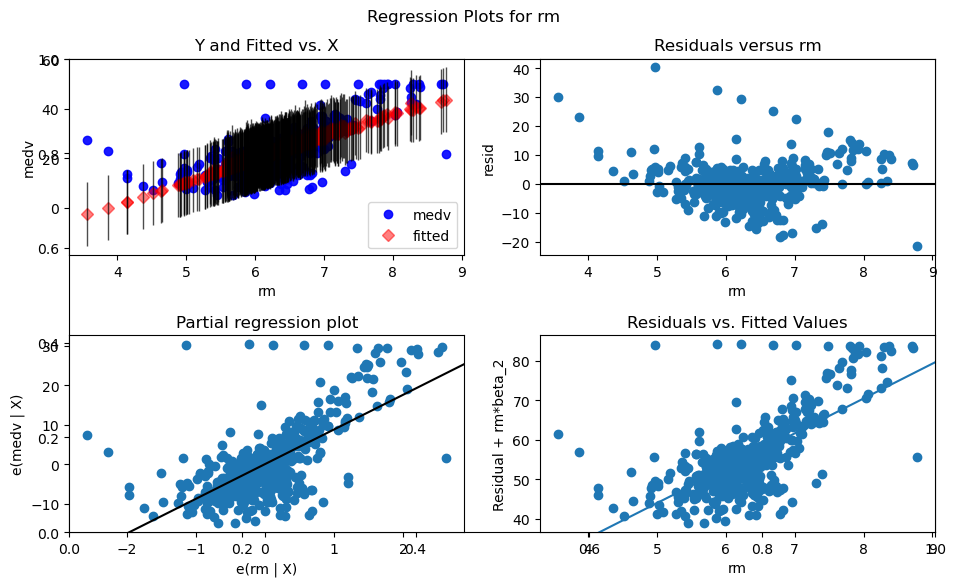

In [16]:
# Residuals vs. Fitted Values Plot 
fig,ax = plt.subplots(1,1, figsize=(10, 6.18))
sm.graphics.plot_regress_exog(results, 'rm', fig=fig)
plt.title('Residuals vs. Fitted Values')

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.
- In the context of the 'Boston' dataset:
- H0 : Both 'dis' and 'rm' have no effect on 'medv' when considered together in the model.
- H1: At least one of the variables 'dis' or 'rm' affects 'medv'. 

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?
- Yes. Both 'dis' and 'rm' are predictive of 'medv'.
- Both 'dis' and 'rm' are statistically significant predictors of 'medv', as their p-values are well below the common significance level of 0.05. Additionally, the F-statistic for the overall model is significant, suggesting  that the predictors 'dis' and 'rm' together explain a substantial portion of the variance in 'medv'.

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?
- Observations with large residuals (points far from the the line at zero) are considered outliers.
- Impacts on the Model:
    - **Inflated Errors**: Outliers can inflate the standard errors of the coefficients.
    - **Biased Estimates**: They can bias the regression coefficients, making them less reliable.
    - **Influence on Fit**: Outliers can disproportionately affect the model fit, leading to misleading interpretations.
    - **Impact on Prediction Intervals**: Outliers can significantly impact the estimation of prediction intervals, leading to intervals that are wider or more conservative than they would be without outliers.
    

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [18]:
# Add your code here

# Prepare the data
X = Boston[['dis', 'rm']]  # Predictor variables
X['dis_rm'] = X['dis'] * X['rm']  # Interaction term
X = sm.add_constant(X)  # Add a constant term for the intercept
y = Boston['medv']  # Response variable

# Fit the regression model with interaction term
model_interaction = sm.OLS(y, X)
results_interaction = model_interaction.fit()

# Review the summary of the regression results
print(results_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 28 May 2024   Prob (F-statistic):           8.37e-79
Time:                        16:33:21   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2533      4.895     -3.116      0.0

/var/folders/g3/8f7nkprx7tq6nl9fhkqp2yyh0000gn/T/ipykernel_70859/2701177065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dis_rm'] = X['dis'] * X['rm']  # Interaction term


_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.
- Yes, there is an interaction as the p-value for 'dis_rm' is less than 0.05.
- The interaction between 'dis' and 'rm' indicates that the effect of the distance to employment centers ('dis') on the median home value ('medv') varies depending on the average number of rooms per dwelling ('rm'). This suggests that these 2 factors ('dis' and 'rm') jointly influence home values ('medv') rather than independently.


# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
